In [ ]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Lecture des données
data = pd.read_csv("bank-full.csv", sep=";")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# 1- Préparation des données pour le forage des règles d’association :
#### On va réaliser des visualisations à partir de différents modèles pour connaitre les variables les plus importantes du dataset

In [ ]:
# On enlève les doublons du dataset
data = data.drop_duplicates()

Encodage des variables catégorielles pour les utiliser dans les modèles d'exctraction de caractéristiques

In [ ]:
# On convertit les variables categorielles en variables numériques
from sklearn.preprocessing import LabelEncoder

# On recupere la liste des variables catégoriques
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

# Initialisation du LabelEncoder
le = LabelEncoder()
# On applique sur toutes les colonnes categoriques
for col in cat_cols:
  data[col] = le.fit_transform(data[col])
  print(data)


       age  job   marital  education default  balance housing loan    contact  \
0       58    4   married   tertiary      no     2143     yes   no    unknown   
1       44    9    single  secondary      no       29     yes   no    unknown   
2       33    2   married  secondary      no        2     yes  yes    unknown   
3       47    1   married    unknown      no     1506     yes   no    unknown   
4       33   11    single    unknown      no        1      no   no    unknown   
...    ...  ...       ...        ...     ...      ...     ...  ...        ...   
45206   51    9   married   tertiary      no      825      no   no   cellular   
45207   71    5  divorced    primary      no     1729      no   no   cellular   
45208   72    5   married  secondary      no     5715      no   no   cellular   
45209   57    1   married  secondary      no      668      no   no  telephone   
45210   37    2   married  secondary      no     2971      no   no   cellular   

       day month  duration 

#### On va maintenant standardiser les données

In [ ]:
from sklearn.preprocessing import StandardScaler
# On sépare la variable cible y
X = data.drop('y', axis=1)
y = data['y']

#Initialisation
scaler = StandardScaler()

# On fit le modele sur les données
scaler.fit(X)

# On applique la methode transform()
scaled_data = scaler.transform(X)

# On convertit les données standardisés en DataFrame
scaled_data = pd.DataFrame(scaled_data, columns = X.columns)
scaled_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


### On va maintenant utiliser le modèle de foret aléatoire pour identifier les variables les plus importantes pour la prédiction. On va aussi utiliser la régression logistique afin de mesurer l'impact des variables explicatives sur la variable cible 'y'.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialisation
model = RandomForestClassifier()
model.fit(X, y)
# On recupere l'importance des caracteristiques
importances = model.feature_importances_

# On affiche l'importances des caracteristiques
for feature, importance in zip(X.columns, importances):
  print(f'{feature}: {importance}')

age: 0.10240322386269872
job: 0.04879464143376928
marital: 0.022342151101508563
education: 0.027629741440785057
default: 0.001860827025727855
balance: 0.1105973098954362
housing: 0.026326535093034367
loan: 0.009960572755855192
contact: 0.01972563014932466
day: 0.08930164082587715
month: 0.08647578820417659
duration: 0.29071299807065637
campaign: 0.03861220311589381
pdays: 0.04970102230325532
previous: 0.020280487475528977
poutcome: 0.05527522724647185


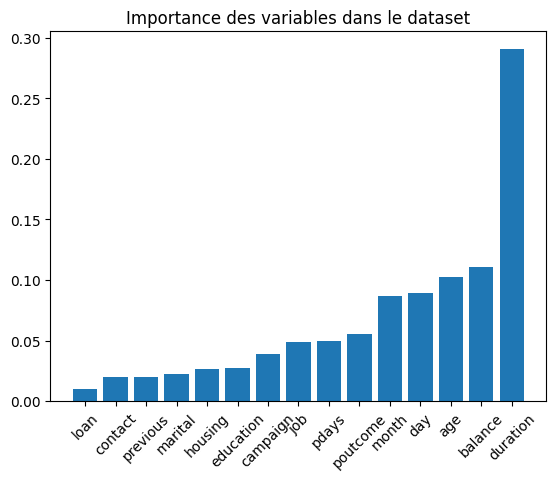

In [ ]:
# On récupere les indices des 15 caractéristiques les plus importantes
indices = importances.argsort()[-15:]

# On affiche le graphique
plt.figure()
plt.title("Importance des variables dans le dataset")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation =45)
plt.show()

## On compare maintenant ces résultats avec ceux de la régression logistique qui de mesure l'impact des variables explicatives sur la variable cible 'y'

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialisation
model = LogisticRegression()
model.fit(X, y)
# On recupere l'importance des caracteristiques
importances = abs(model.coef_[0])

# On affiche l'importances des caracteristiques
for feature, importance in zip(X.columns, importances):
  print(f'{feature}: {importance}')

age: 0.031692765403521186
job: 0.014594058882056728
marital: 0.09213230981459113
education: 0.013176447158978869
default: 0.004794347056026244
balance: 4.004285609461158e-05
housing: 0.18162343592469934
loan: 0.0535131142585965
contact: 0.18677285428575285
day: 0.008423555030386953
month: 0.05994033006545065
duration: 0.0032714881577722192
campaign: 0.2670730088516724
pdays: 0.001237206851843585
previous: 0.12001003120618764
poutcome: 0.1805938004466249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


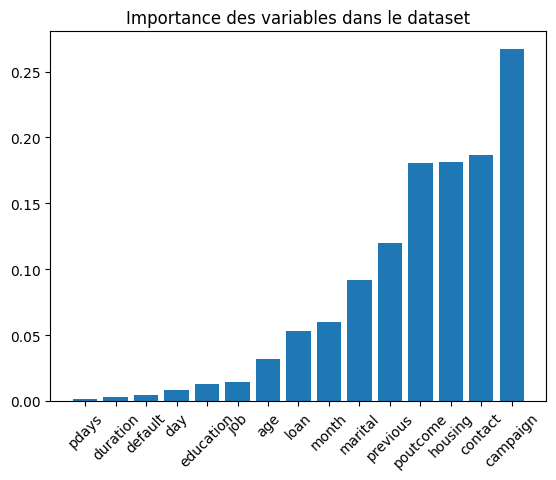

In [ ]:
# On récupere les indices des 15 caractéristiques les plus importantes
indices = importances.argsort()[-15:]

# On affiche le graphique
plt.figure()
plt.title("Importance des variables dans le dataset")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation =45)
plt.show()

# 1.a : discretisation des variables continues

In [ ]:
data_bank = pd.read_csv("bank-full.csv", sep=";")

In [ ]:
# On garde uniquement les variables importantes
# On enlève donc "pdays", "month" et "previous"
data_bank = data_bank.drop(["pdays", "month", "previous"], axis=1)

In [ ]:
# Discrétiser la variable 'balance' en 4 catégories
data_bank["balance"] = pd.qcut(data_bank["balance"], 4, labels = ['low', 'middle', 'high', 'very_high'])

In [ ]:
# Discrétiser la variable 'age' en 4  catégories
age_bins = [0, 18, 25, 60, 120]
data_bank["age"] = pd.cut(data_bank["age"], bins = age_bins, labels= ["enfant", "jeune_adulte", "adulte", "sénior"])

In [ ]:
# Discrétiser la variable 'duration' en 4 catégories
data_bank["duration"] = pd.qcut(data_bank["duration"], 3, labels = ['short', 'medium', 'long_time'])

In [ ]:
# Discrétiser la variable 'day' en 3 catégories
data_bank["day"] = pd.qcut(data_bank["day"], 3, labels = ['recently', 'medium', 'long_time'])

In [ ]:
# Discrétiser la variable 'day' en 4 catégories
data_bank['campaign'] = pd.qcut(data_bank['campaign'], q=6, duplicates ='drop', labels =["very_few", "few", "medium", "a_lot"])

In [ ]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,poutcome,y
0,adulte,management,married,tertiary,no,very_high,yes,no,unknown,recently,long_time,very_few,unknown,no
1,adulte,technician,single,secondary,no,low,yes,no,unknown,recently,medium,very_few,unknown,no
2,adulte,entrepreneur,married,secondary,no,low,yes,yes,unknown,recently,short,very_few,unknown,no
3,adulte,blue-collar,married,unknown,no,very_high,yes,no,unknown,recently,short,very_few,unknown,no
4,adulte,unknown,single,unknown,no,low,no,no,unknown,recently,medium,very_few,unknown,no


# 1.B transformation des données en format binaires

In [ ]:
data_bank2 = data_bank.copy()

In [ ]:
# On transforme les données en format binaire
data_bank2 = pd.get_dummies(data_bank2)

In [ ]:
data_bank2.head()

,age_enfant,age_jeune_adulte,age_adulte,age_sénior,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,campaign_very_few,campaign_few,campaign_medium,campaign_a_lot,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


### Le dataset est pret

# Question 2
### Apriori

In [ ]:
# On prépare les données pour la règle d'association: si x <= 0 ==> renvoie 0 sinon 1
def encode(x):
  if x <= 0:
    return 0
  if x >= 0:
    return 1
# On appplique cela sur notre dataset
data2 = data_bank2.applymap(encode)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import time
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
start_time =time.time()
# On génere les caracteristiques frequentes
# On régle le support minimal à 0.05
frequent_items = apriori(data2, min_support = 0.05, use_colnames = True)
# On génere les regles d'association
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.5)
# On affiche les résultats en triant le résultat par confiance (tri descendant).
rules = rules.head(10).sort_values(by = 'confidence', ascending = False)
end_time = time.time()
rules.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(job_management),(age_adulte),0.209197,0.944173,0.204464,0.977374,1.035164,0.006945,2.467350
4,(job_technician),(age_adulte),0.168034,0.944173,0.163898,0.975385,1.033058,0.005245,2.268014
1,(job_blue-collar),(age_adulte),0.215257,0.944173,0.208821,0.970099,1.027459,0.005581,1.867043
0,(job_admin.),(age_adulte),0.114375,0.944173,0.110327,0.964610,1.021646,0.002338,1.577498
3,(job_services),(age_adulte),0.091880,0.944173,0.088275,0.960761,1.017569,0.001524,1.422735


###### On voit une relation entre les catégories d'emploi et les personnes d'age adulte (ce qui semble logique)

In [ ]:
print(f"Le temps d'exécution est de {end_time -start_time} secondes.")

Le temps d'exécution est de 41.84286594390869 secondes.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### fp-growth

In [ ]:
# Si = 1 alors True sinon False
enc = lambda x: True if x == 1 else False
databank = data2.applymap(enc)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import time
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
start_time =time.time()
# On génere les caracteristiques frequentes
# On régle le support minimal à 0.05
frequent_items = fpgrowth(databank, min_support = 0.05, use_colnames = True)
# On génere les regles d'association
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.5)
# On affiche les résultats en triant le résultat par confiance (tri descendant).
rules = rules.head(10).sort_values(by = 'confidence', ascending = False)
end_time = time.time()
frequent_items.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.981973,(default_no)
1,0.944173,(age_adulte)
2,0.883015,(y_no)
3,0.839774,(loan_no)
4,0.817478,(poutcome_unknown)
5,0.664639,(campaign_very_few)
6,0.601933,(marital_married)
7,0.555838,(housing_yes)
8,0.336290,(day_recently)
9,0.332485,(duration_long_time)


In [ ]:
print(f"Le temps d'exécution est de {end_time -start_time} secondes.")

Le temps d'exécution est de 6.337863445281982 secondes.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## On remarque que le temps d'exécution pour l'algorithme fp-growth (6 secondes) est beaucoup lus rapide que celui de l'algortihme apriori (40 secondes). On voit que l'algorithme fp-growth semble plus efficace

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# Question3:

#### Regles d'association qui ont comme conséquence y pour "Apriori"

In [ ]:
import time
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
start_time =time.time()
# On génere les caracteristiques frequentes
# On régle le support minimal à 0.05
frequent_items = apriori(data_bank2, min_support = 0.05, use_colnames = True)
# On génere les regles d'association
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.5)
# On affiche les régles d'association pour 'y_no'
target = '{\'y_no\'}'
results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na = False)].sort_values(by='confidence', ascending = False)

end_time = time.time()
results_attrition_no.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58161,"(contact_unknown, poutcome_unknown, duration_s...",(y_no),0.058968,0.883015,0.058902,0.998875,1.131209,0.006832,103.960496
88729,"(poutcome_unknown, age_adulte, duration_short,...",(y_no),0.058216,0.883015,0.058150,0.998860,1.131193,0.006744,102.634669
120936,"(poutcome_unknown, duration_short, marital_mar...",(y_no),0.057619,0.883015,0.057552,0.998848,1.131179,0.006674,101.581805
146651,"(poutcome_unknown, age_adulte, duration_short,...",(y_no),0.056889,0.883015,0.056822,0.998834,1.131162,0.006589,100.294972
49227,"(age_adulte, poutcome_unknown, duration_short,...",(y_no),0.059366,0.883015,0.059278,0.998510,1.130796,0.006856,78.496804


In [ ]:
results_attrition_no['antecedents'][58161]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'contact_unknown',
           'duration_short',
           'marital_married',
           'poutcome_unknown'})

In [ ]:
import time
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
start_time =time.time()
# On génere les caracteristiques frequentes
# On régle le support minimal à 0.01
frequent_items = apriori(data_bank2, min_support = 0.05, use_colnames = True)
# On génere les regles d'association
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.5)
# On affiche les régles d'association pour 'y_yes'
target = '{\'y_yes\'}'
results_attrition_yes = rules[rules['consequents'].astype(str).str.contains(target, na = False)].sort_values(by='confidence', ascending = False)

end_time = time.time()
results_attrition_yes.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
results_attrition_yes['antecedents']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], Name: antecedents, dtype: object)

##### Règles d'association qui ont pour conséquences 'y' pour "fp-growth"

In [ ]:
import time
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.frequent_patterns import association_rules
start_time =time.time()
# On génere les caracteristiques frequentes
# On régle le support minimal à 0.05
frequent_items = fpgrowth(data_bank2, min_support = 0.05, use_colnames = True)
# On génere les regles d'association
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.5)
# On affiche les régles d'association pour 'y_no'
target = '{\'y_no\'}'
results_attrition_no_fp = rules[rules['consequents'].astype(str).str.contains(target, na = False)].sort_values(by='confidence', ascending = False)

end_time = time.time()
results_attrition_no_fp.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46577,"(contact_unknown, poutcome_unknown, duration_s...",(y_no),0.058968,0.883015,0.058902,0.998875,1.131209,0.006832,103.960496
46598,"(poutcome_unknown, age_adulte, duration_short,...",(y_no),0.058216,0.883015,0.058150,0.998860,1.131193,0.006744,102.634669
46635,"(poutcome_unknown, duration_short, marital_mar...",(y_no),0.057619,0.883015,0.057552,0.998848,1.131179,0.006674,101.581805
46680,"(poutcome_unknown, age_adulte, duration_short,...",(y_no),0.056889,0.883015,0.056822,0.998834,1.131162,0.006589,100.294972
161245,"(age_adulte, poutcome_unknown, duration_short,...",(y_no),0.059366,0.883015,0.059278,0.998510,1.130796,0.006856,78.496804


In [ ]:
results_attrition_no_fp['antecedents'][46577]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'contact_unknown',
           'duration_short',
           'marital_married',
           'poutcome_unknown'})

In [ ]:
import time
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.frequent_patterns import association_rules
start_time =time.time()
# On génere les caracteristiques frequentes
# On régle le support minimal à 0.05
frequent_items = fpgrowth(data_bank2, min_support = 0.05, use_colnames = True)
# On génere les regles d'association
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.5)
# On affiche les régles d'association pour 'y_yes'
target = '{\'y_yes\'}'
results_attrition_yes_fp = rules[rules['consequents'].astype(str).str.contains(target, na = False)].sort_values(by='confidence', ascending = False)

end_time = time.time()
results_attrition_yes_fp.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Question 4

In [ ]:
results_attrition_no['antecedents'][58161]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'contact_unknown',
           'duration_short',
           'marital_married',
           'poutcome_unknown'})

In [ ]:
results_attrition_no_fp['antecedents'][46577]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'contact_unknown',
           'duration_short',
           'marital_married',
           'poutcome_unknown'})

## Un client qui  ne s'inscrit pas à un depot à terme a d'après notre analyse


les caractéristiques suivantes: Statut marital == > marié, la durée du dernier contact était courte, on ne sait pas par quel moyen il à été contacté et on ne sait pas si la dernière campagne marketing a fonctionné.